# Explore house prices data

## Understand the problem
The data set of this project has been downloaded from [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) Kaggle Competition. The project aims at predicting house prices in Ames, Iowa, USA based on the provided data set.

## Hypothesis generation
Before prediction step, we generally ask which factors influence our prediction ? In our case, we need to know if there are factors that influence house prices or not. By generating hypothesis, we have to define two hypothesis :
- **Null Hypothesis**: There exists no impact of a particular feature on the dependant variable.
- **Alternate Hypothesis**: There exists a direct impact of a particular feature on the dependant variable.

## Data Exploration

In [1]:
# loading librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# loading data
train = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")

In [3]:
# show the head of the data
train.head()

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [4]:
print('Train data has {} rows and {} columns'.format(train.shape[0], train.shape[1]))
print('Test data has {} rows and {} columns'.format(test.shape[0], test.shape[1]))

Train data has 1460 rows and 81 columns
Test data has 1459 rows and 80 columns


### Missing values
Let's check if the train data has any missing values. Out of 81 features, 19 have missing values.

In [5]:
missing_data = train.columns[train.isnull().any()]
print("Number of features that have missing values is {} features".format(len(missing_data)))
print(missing_data)

Number of features that have missing values is 19 features
Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [6]:
# function to show frequencies in percentages
def percentage(x):
    return '{0:.2f} %'.format(x * 100)

In [7]:
miss = train.isnull().sum() / len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss.apply(percentage)

Electrical       0.07 %
MasVnrType       0.55 %
MasVnrArea       0.55 %
BsmtQual         2.53 %
BsmtCond         2.53 %
BsmtFinType1     2.53 %
BsmtExposure     2.60 %
BsmtFinType2     2.60 %
GarageCond       5.55 %
GarageQual       5.55 %
GarageFinish     5.55 %
GarageType       5.55 %
GarageYrBlt      5.55 %
LotFrontage     17.74 %
FireplaceQu     47.26 %
Fence           80.75 %
Alley           93.77 %
MiscFeature     96.30 %
PoolQC          99.52 %
dtype: object

We can see that the variable PoolQC has 99.5% missing values followed by MiscFeature, Alley and Fence.

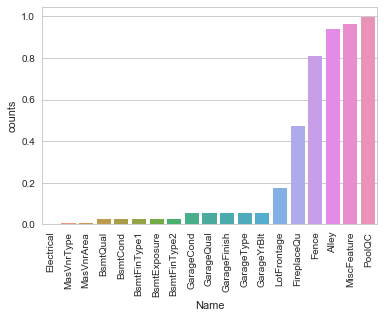

In [8]:
# prepare missing data for visualization
miss = miss.to_frame()
miss.columns = ['counts']
miss.index.names = ['Name']
miss['Name'] = miss.index

# plot the missing value count
sns.set(style='whitegrid', color_codes=True)
sns.barplot(x='Name', y='counts', data=miss)
plt.xticks(rotation=90)
plt.show()

### Duplicates data

In [9]:
# duplicates
duplicates = sum(train.duplicated(train.columns.difference(["Id"])))
print("The number of duplicates in train data is {}".format(duplicates))

The number of duplicates in train data is 0


### Target variable distribution
Let's check the distribution of the target variable **SalePrice**.

Mean of the target variable distribution is 180921.19589041095


/Users/youcef/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


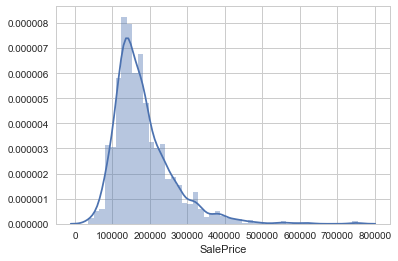

In [10]:
# target variable distribution - SalePrice
print('Mean of the target variable distribution is {}'.format(train['SalePrice'].mean()))
sns.distplot(train['SalePrice'])

We see that the distribution above (SalePrice distribution) has a right-skewed distribution. We know that the normal distribution is the easiest distribution to work with in order to gain an understanding about statistics and better modeling the relations between target and independent variables. In our case, maybe it's better to transform this variable so that it becomes normally distributed.

We can confirm this skewed behavior by calculating the [skewness metric](https://en.wikipedia.org/wiki/Skewness) of the variable distribution.

In [11]:
# skewness
print("The skewness of the target variable SalePrice is {}".format(train['SalePrice'].skew()))

The skewness of the target variable SalePrice is 1.8828757597682129


The result confirms that the distribution is right-skewed (positive), precisely it means that the right side is more skewed than the left side.

Generally, it's easier to work with normal distribution, so we try to log-transform our target variable distribution to have to see if we get any closer to normal distribution. 

Skewness of the target variable after log-transformation is 0.12133506220520406


/Users/youcef/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


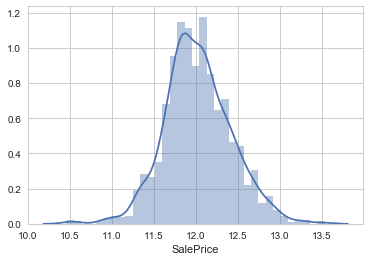

In [12]:
# target variable transformation (log transformation)
target = np.log(train['SalePrice'])
print("Skewness of the target variable after log-transformation is {}".format(target.skew()))
sns.distplot(target)

The log-transformation of the target variable has helped us fixing its skewed-distribution and now, it looks closer to normal.

### Univariate and bivariate analysis

In [13]:
# univariate analysis for independant variables
df_cat = train.select_dtypes(exclude=[np.number])
df_num = train.select_dtypes(include=[np.number])
del df_num['Id'] # we remove Id column
print("There are {} categorical variables and {} numerical variables in train data".format(df_cat.shape[1], 
                                                                                           df_num.shape[1]))

# describe categorical variables
df_cat.describe()

There are 43 categorical variables and 37 numerical variables in train data


       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1      ...      GarageType  \
count       1460         1460       1460      ...            1379   
unique         3           25          9      ...               6   
top          Gtl        NAmes       Norm      ...          Attchd   
freq        1382          225       1260      ...             870   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1379       1379       1379       1460      7    281   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Gd  MnPrv   
freq    

In [14]:
# describe numerical variables
df_num.describe()

        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000

Since we have 80 variables, analysing variables one by one wouldn't be an efficient approach. Instead, we will look at some variables based on their correlation with the target variable.

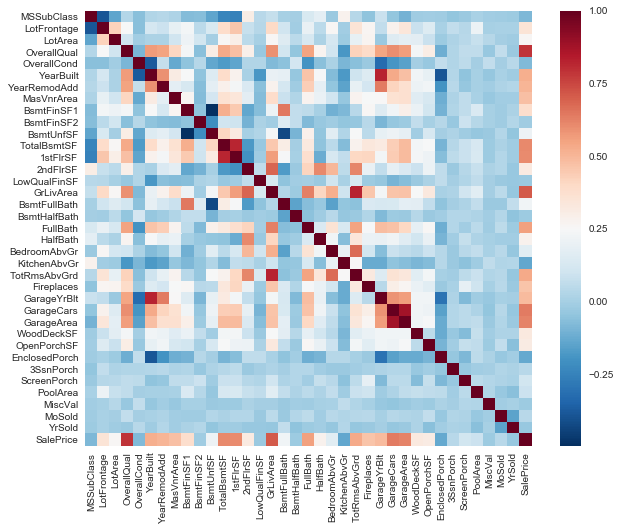

In [15]:
# correlation heatmap
corr = df_num.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, ax=ax, cmap='RdBu_r')

In the last row of the heatmap, we can see the correlation between the target variable 'SalePrice' and all other numerical variables. We notice that some variables are strongly correlated with the target variable as OverallQual, GrLivArea and GarageCars. To confirm that, let's show the correlation scores.

In [16]:
# correlation scores againt target variable
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

We see that the OverallQual is 79 % correlated with the target variable. This variable refers to the overall material and finish of the house, its modalities vary from 'Very Poor' to 'Very Excellent'. We can say that makes sense, since people usually are interested in the quality and finish of the house that fit their dream house. In addition, GrLivArea is 70 % correlated with the target variable, it refers to the living area above ground in square feet, what makes sense. The following variables, which refer to the garage details, tell us that people care about the transport details and convenience.